In [2]:
import dl_weather

import logging

logging.getLogger().setLevel(logging.INFO)
logging.captureWarnings(True)

# For generating the geocontext:
from IPython import display as dsp
import shapely.geometry as sg
import descarteslabs as dl
import geojson

# For plotting timeseries:
import matplotlib.pyplot as plt

---
## Create geoctx

In [16]:
# Get shape of state in Brazil
places_client = dl.Places()
state = places_client.shape("south-america_brazil_mato-grosso-do-sul")

# Define Workflows GeoContext
geoctx = dl.scenes.AOI(sg.shape(state.geometry).simplify(0.01),
                       crs="EPSG:4326", resolution=0.01)

# Display on a map:
dsp.GeoJSON(geojson.Feature(geometry=geoctx.geometry))

<IPython.display.GeoJSON object>

In [7]:
lat, lon = 36.334871, -120.227047
geometry = sg.Point(lon, lat).buffer(0.5)
resolution = 20 #meters
aoi = dl.scenes.AOI(geometry=sg.mapping(geometry), resolution=resolution)
pixel_area = resolution * resolution
m2_to_ha = 0.0001

In [13]:
# Load Sentinel-2 Composite
composite_id = "descarteslabs:forest_carbon:S2_GEDI:composite:v1.1"

scenes, ctx = dl.scenes.search(
    aoi,
    products=composite_id,
    start_datetime="2015-01-01",
    end_datetime="2020-12-01",
    limit=500,
)
s2_composite = scenes.mosaic("red green blue", ctx)

dl.scenes.display(s2_composite)

ValueError: This SceneCollection is empty

---
---
## Run short unmasked timeseries:
1-month long, daily frequency

ERA5: precipitation and zonal wind speed

In [17]:
%%time
ts = dl_weather.get_weather_time_series(weather_product="ecmwf:era5:v0",
                                        weather_vars = ["tp",'100u'],
                                        weather_start = '2018-01-01',
                                        weather_end = '2018-02-01',
                                        frequency='daily',
                                        geoctx=geoctx)
ts.head()

Submitting 31 jobs 



  0%|          | 0/31 [00:00<?, ?it/s]

CPU times: user 454 ms, sys: 65.6 ms, total: 520 ms
Wall time: 11.3 s


,tp,100u
2018-01-01,0.006608,1.559266
2018-01-02,0.015886,2.760741
2018-01-03,0.005958,2.891965
2018-01-04,0.000628,0.074936
2018-01-05,0.005842,-0.130139


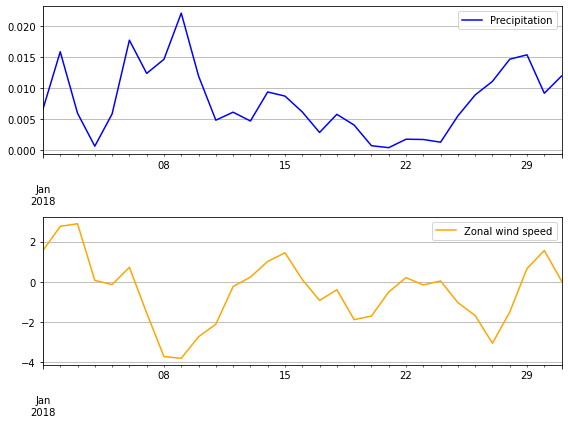

In [18]:
plt.figure(figsize=(8,6))
plt.subplot(2,1,1)
ts['tp'].plot(color='blue', label='Precipitation')
plt.grid('lightgray')
plt.legend()
plt.subplot(2,1,2) 
ts['100u'].plot(color='orange', label='Zonal wind speed')
plt.grid('lightgray')
plt.legend()
plt.tight_layout()


---
---
## Run masked timeseries
1-year long, monthly frequency

ERA5: precipitation and zonal wind speed

In [ ]:
%%time
ts = dl_weather.get_weather_time_series(weather_product="ecmwf:era5:v0",
                                        weather_vars = ["tp",'100u'],
                                        weather_start = '2015-01-01',
                                        weather_end = '2016-01-01',
                                        frequency='monthly',
                                        geoctx=geoctx,
                                        land_cover_product = "modis:mcd12q1:051",
                                        land_cover_bands = "Land_Cover_Type_1",
                                        land_cover_value = 12,
                                        land_cover_start = "2010-01-01",
                                        land_cover_end = "2011-01-01")
ts.head()

In [ ]:
plt.figure(figsize=(8,6))
plt.subplot(2,1,1)
ts['tp'].plot(color='blue', label='Precipitation')
plt.grid('lightgray')
plt.legend()
plt.subplot(2,1,2)
ts['100u'].plot(color='orange', label='Zonal wind speed')
plt.grid('lightgray')
plt.legend()
plt.tight_layout()


---
---
## Run masked timeseries

10-year long, monthly frequency

ERA5: only precipitation


In [ ]:
%%time
ts = dl_weather.get_weather_time_series(weather_product="ecmwf:era5:v0",
                                        weather_vars = ["tp"],
                                        weather_start = '2005-01-01',
                                        weather_end = '2015-01-01',
                                        frequency='monthly',
                                        geoctx=geoctx,
                                        land_cover_product = "modis:mcd12q1:051",
                                        land_cover_bands = "Land_Cover_Type_1",
                                        land_cover_value = 12,
                                        land_cover_start = "2010-01-01",
                                        land_cover_end = "2011-01-01")
ts.head()

In [ ]:
plt.figure(figsize=(20,4))
ts['tp'].plot(color='blue', label='Precipitation')
plt.grid('lightgray')
plt.legend()
plt.tight_layout()
